In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telco=pd.read_csv('telco_churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
tenure=telco.tenure
mon_ch=telco.MonthlyCharges
print(tenure.head(), mon_ch.head())

corr, p=stats.pearsonr(tenure, mon_ch)
print(corr, p)

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64 0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64
0.24789985628615002 4.0940449915016345e-99


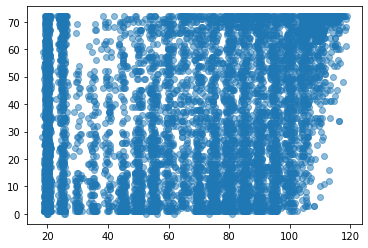

In [10]:
plt.scatter(mon_ch, tenure, alpha=0.5)

In [45]:
total=telco.TotalCharges



In [48]:
total_clean=total.replace(' ', 0)


In [50]:
total_clean=total_clean.astype(float)


In [51]:
corr, p=stats.pearsonr(tenure, total_clean)


In [52]:
print(corr, p)

0.8261783979502421 0.0


In [62]:
def cor_fun(telco):
    return pd.Series(stats.pearsonr(tenure, total_clean),
    index=['r', 'p'])

In [63]:
telco.groupby(['InternetService', 'PhoneService']).apply(cor_fun)

r    p
InternetService PhoneService               
DSL             No            0.826178  0.0
                Yes           0.826178  0.0
Fiber optic     Yes           0.826178  0.0
No              Yes           0.826178  0.0

In [65]:
from env import database, username, password

In [66]:
database

'data.codeup.com'

In [67]:
url = f'mysql+pymysql://{username}:{password}@{database}/employees'

In [72]:
pd.read_sql('Select * from employees limit 5', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [79]:
pd.read_sql('SELECT * FROM salaries LIMIT 5', url)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [111]:
new_table=pd.read_sql('''SELECT * FROM employees join salaries using (emp_no) where to_date='9999-01-01'
''',url)

In [112]:
new_table.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [113]:
period=new_table.to_date-new_table.hire_date
period=period.astype(str).str.replace('days, 0:00:00', '' )
period=period.astype(float)
period.head()

0    2926512.0
1    2926729.0
2    2926449.0
3    2926354.0
4    2925338.0
dtype: float64

In [114]:
salary=new_table.salary
salary.head()

0    88958
1    72527
2    43311
3    74057
4    94692
Name: salary, dtype: int64

In [115]:
corr, p=stats.pearsonr(period, salary)
print(corr, p)

0.3064625613186077 0.0
